In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Generate data

In [2]:
X_train = np.linspace(-1, 1, 20)

In [3]:

y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285,
                    -0.2443, -0.02445, 0.00135, -0.2006, 0.07475,
                    -0.1422, 0.06515, 0.15265, 0.3521, 0.28415,
                    0.5524, 0.23115, 0.208835, 0.4211, 0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:
y_test = np.array([-0.69415, -0.451, -0.43005, -0.4484, -0.1475,
                   -0.5019, -0.28055, 0.24595, -0.21425, -0.0286,
                   0.23415, 0.46575, 0.07955, 0.1973, 0.0719,
                   0.3639, 0.5536, 0.3365, 0.50705, 0.33435])

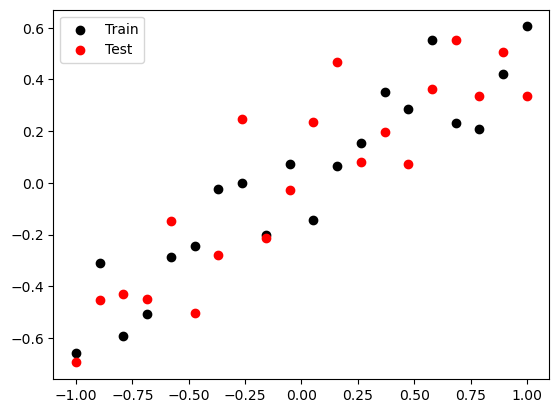

In [6]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()
plt.show()

# Normal

In [7]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

/home/ad/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-10 09:09:20.754102: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0017547408351674676, Test: 0.04583077132701874


In [9]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


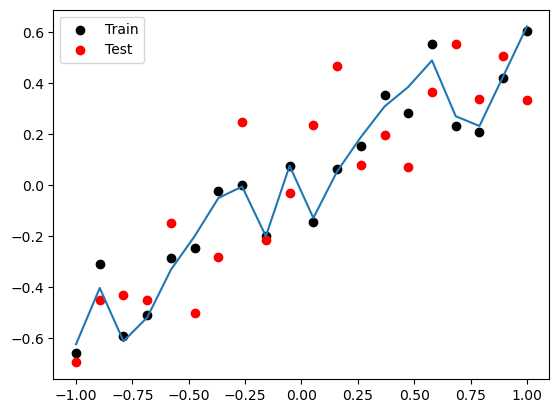

In [10]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim()
plt.show()

# Using Dropout

In [19]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dropout(0.2))#It means 20% nurons off krna hai 128 m s

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])

history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

/home/ad/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.010099755600094795, Test: 0.04034731537103653


In [21]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


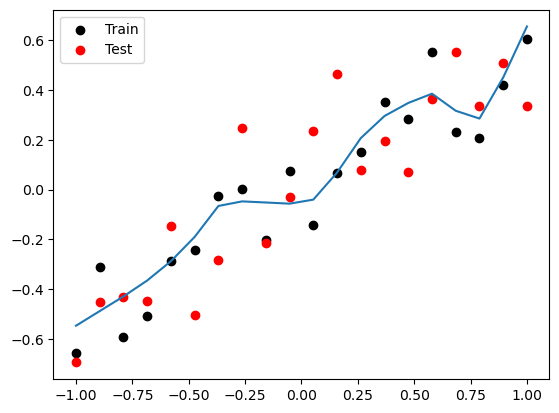

In [22]:
plt.figure()
plt.scatter(X_train,y_train,c='black',label='Train')
plt.scatter(X_test,y_test,c='red',label='Test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim()
plt.show()